# Objective
The main objective of this data analytics project is to analyze pizza sales data to gain insights into customer preferences, sales trends, revenue generation, and operational patterns. Using four tables—Orders, Order Details, Pizzas, and Pizza Types—the project aims to address several business questions, such as:  

Customer Demand Patterns: When do customers tend to place orders? Are there specific times of the year, month, or week when demand spikes? This analysis helps with forecasting and planning resources accordingly.  
**Revenue Trends:** What are the revenue trends over time? Understanding the revenue flow allows the business to track its financial performance, identify peak revenue periods, and make informed pricing or promotional decisions.  
**Pizza Popularity:** Which pizzas and pizza types are the most popular? Knowing customer preferences in terms of types and sizes is valuable for managing inventory, minimizing waste, and maximizing customer satisfaction.  
**Order Composition and Spending Behavior:** How much do customers typically spend on an order, and how many pizzas do they order at a time? This insight helps in designing effective upselling and cross-selling strategies.  
**Product and Menu Optimization:** Based on popularity and revenue, can the menu be optimized? Understanding which pizza types and sizes drive the most revenue or are most frequently ordered can lead to better menu management and promotion of high-profit items.
By generating visualizations from the data, the project provides a holistic view of customer behavior, revenue trends, and product performance. This, in turn, supports decision-making to optimize operations, increase sales, and improve customer satisfaction.

In [1]:
from sqlalchemy import create_engine
import pandas as pd

username = "root"
password = "sql07"
host = "localhost"  
database = "pizzasales"  

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}/{database}")

In [2]:
# Load tables into DataFrames
orders_df = pd.read_sql("SELECT * FROM orders", engine)
order_details_df = pd.read_sql("SELECT * FROM order_details", engine)
pizzas_df = pd.read_sql("SELECT * FROM pizzas", engine)
pizza_types_df = pd.read_sql("SELECT * FROM pizza_types", engine)

# Preview the data
print(orders_df.head())
print(order_details_df.head())
print(pizzas_df.head())
print(pizza_types_df.head())


   order_id  order_date      order_time
0         1  2015-01-01 0 days 11:38:36
1         2  2015-01-01 0 days 11:57:40
2         3  2015-01-01 0 days 12:12:28
3         4  2015-01-01 0 days 12:16:31
4         5  2015-01-01 0 days 12:21:30
   order_details_id  order_id       pizza_id  quantity
0                 1         1     hawaiian_m         1
1                 2         2  classic_dlx_m         1
2                 3         2  five_cheese_l         1
3                 4         2    ital_supr_l         1
4                 5         2     mexicana_m         1
     pizza_id pizza_type_id size  price
0   bbq_ckn_s       bbq_ckn    S  12.75
1   bbq_ckn_m       bbq_ckn    M  16.75
2   bbq_ckn_l       bbq_ckn    L  20.75
3  cali_ckn_s      cali_ckn    S  12.75
4  cali_ckn_m      cali_ckn    M  16.75
  pizza_type_id                          name category  \
0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
1      cali_ckn  The California Chicken Pizza  Chicken   
2   ckn_alfredo 

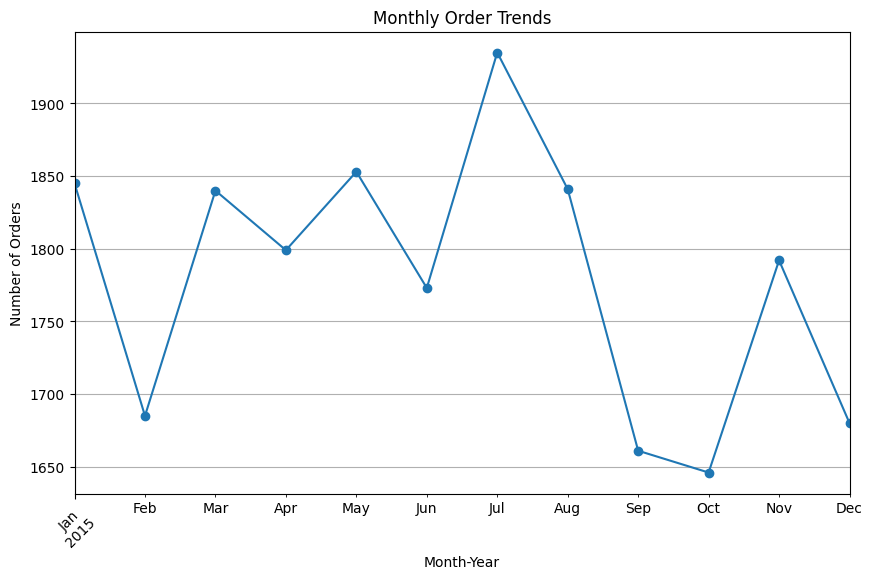

In [3]:
import matplotlib.pyplot as plt

# Convert order date to datetime and extract month-year
orders_df['order_date'] = pd.to_datetime(orders_df['order_date'])
orders_df['month_year'] = orders_df['order_date'].dt.to_period('M')

# Count orders per month
monthly_orders = orders_df.groupby('month_year').size()

# Plot monthly orders
plt.figure(figsize=(10, 6))
monthly_orders.plot(kind='line', marker='o')
plt.title("Monthly Order Trends")
plt.xlabel("Month-Year")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Orders Over Time  
Description: This line chart shows the trend of total orders over time, specifically by month.
Insight: This helps identify patterns or seasonality in customer demand. For example, you may notice peaks during specific months, which could suggest seasonal popularity or the effect of promotions.

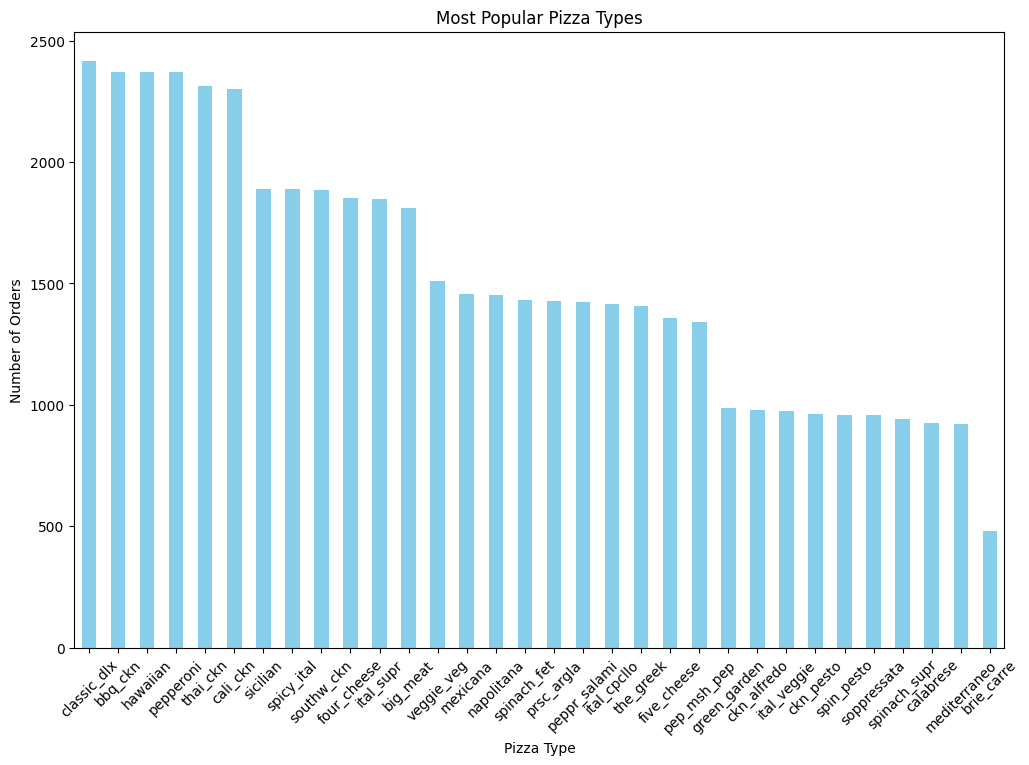

In [7]:
# Merge order details and pizzas to get pizza type information
order_pizza_types = order_details_df.merge(pizzas_df, on="pizza_id").merge(pizza_types_df, on="pizza_type_id")

# Count pizza types
popular_pizza_types = order_pizza_types['pizza_type_id'].value_counts()

# Plot most popular pizza types
plt.figure(figsize=(12, 8))
popular_pizza_types.plot(kind='bar', color='skyblue')
plt.title("Most Popular Pizza Types")
plt.xlabel("Pizza Type")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


Most Popular Pizza Types  
Description: This bar chart displays the frequency of each pizza type sold.
Insight: This helps identify which pizza types are the most popular among customers, enabling you to prioritize inventory for high-demand items or consider promotions for lower-selling types.

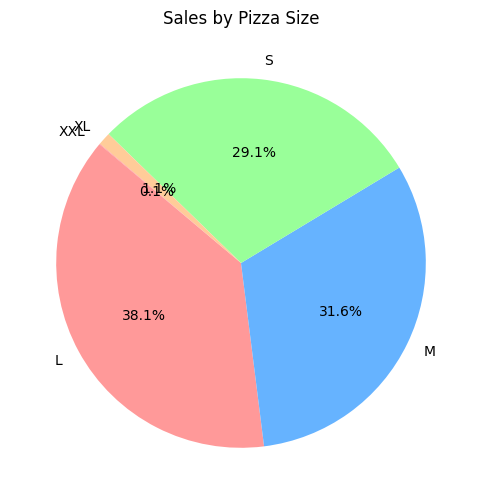

In [8]:
# Count orders by pizza size
pizza_size_counts = order_details_df.merge(pizzas_df, on="pizza_id")['size'].value_counts()

# Plot pizza sizes
plt.figure(figsize=(8, 6))
pizza_size_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Sales by Pizza Size")
plt.ylabel("")  # Remove y-axis label
plt.show()


 Sales by Pizza Size  
Description: This pie chart shows the proportion of sales by pizza size.
Insight: Understanding size preferences helps in planning inventory and setting pricing strategies. If a particular size is more popular, it may be beneficial to create combo deals or focus promotions around that size.

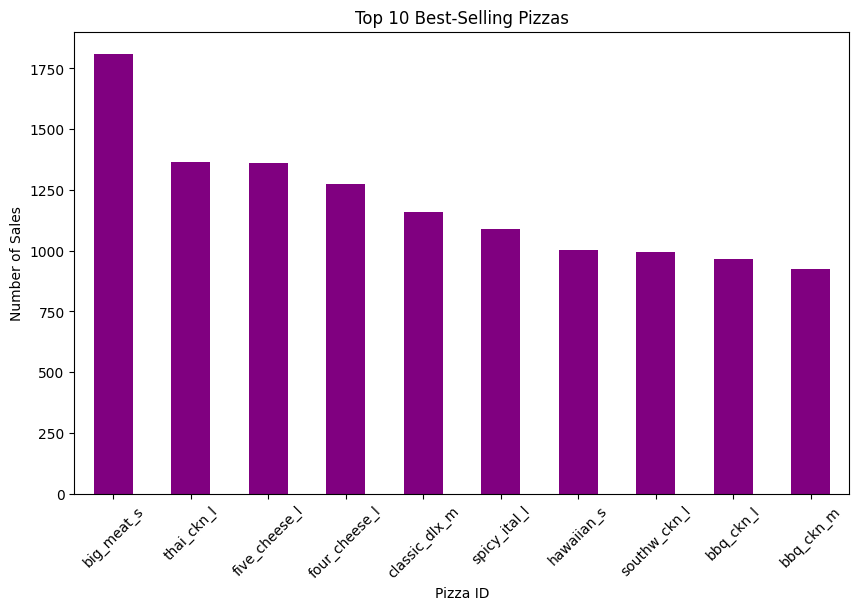

In [9]:
# Count pizzas in order details
top_pizzas = order_details_df['pizza_id'].value_counts().head(10)

# Plot top pizzas
plt.figure(figsize=(10, 6))
top_pizzas.plot(kind='bar', color='purple')
plt.title("Top 10 Best-Selling Pizzas")
plt.xlabel("Pizza ID")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.show()

Top 10 Best-Selling Pizzas  
Description: This bar chart highlights the ten most frequently ordered pizzas.
Insight: Knowing the best-selling pizzas allows you to ensure that ingredients are well-stocked for these items and can also inform menu placement (highlighting popular options) and pricing adjustments.

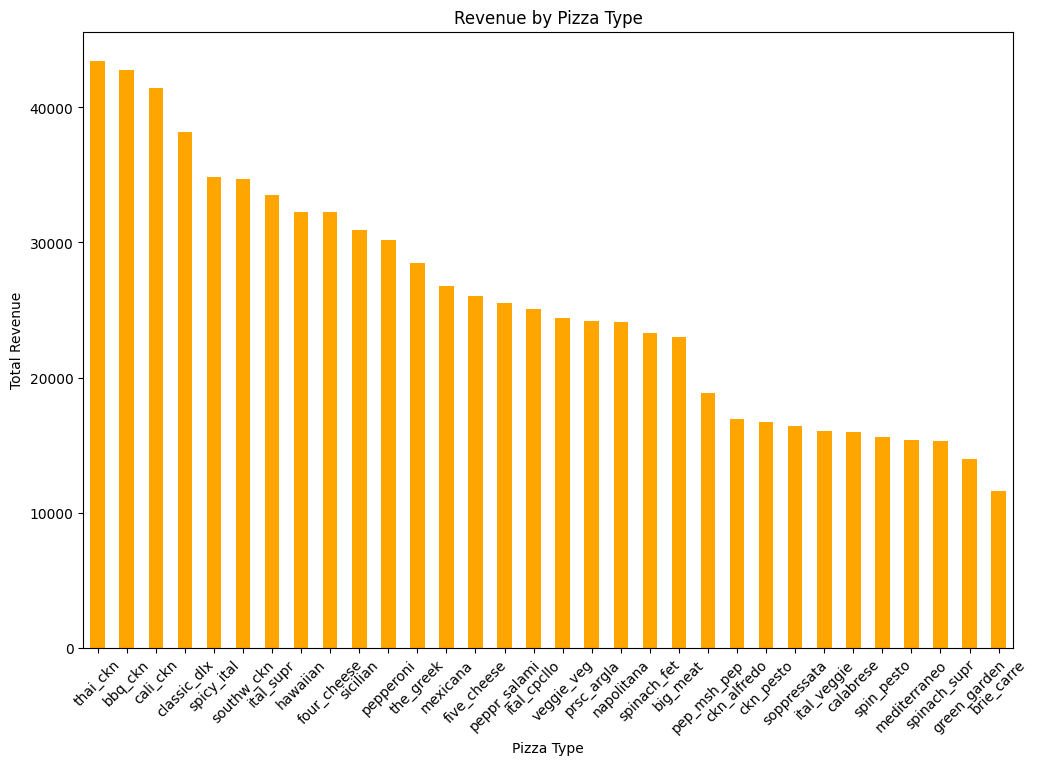

In [10]:
# Calculate revenue by pizza type
order_pizza_revenue = order_pizza_types.copy()
order_pizza_revenue['revenue'] = order_pizza_revenue['price'] * order_pizza_revenue['quantity']
revenue_by_type = order_pizza_revenue.groupby('pizza_type_id')['revenue'].sum()

# Plot revenue by pizza type
plt.figure(figsize=(12, 8))
revenue_by_type.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Revenue by Pizza Type")
plt.xlabel("Pizza Type")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


Revenue by Pizza Type  
Description: This bar chart shows the total revenue generated by each pizza type.
Insight: This chart not only highlights popular pizza types but also reveals which types generate the most revenue. Higher-revenue pizzas might warrant increased promotional focus, while lower-revenue items could be candidates for re-evaluation.

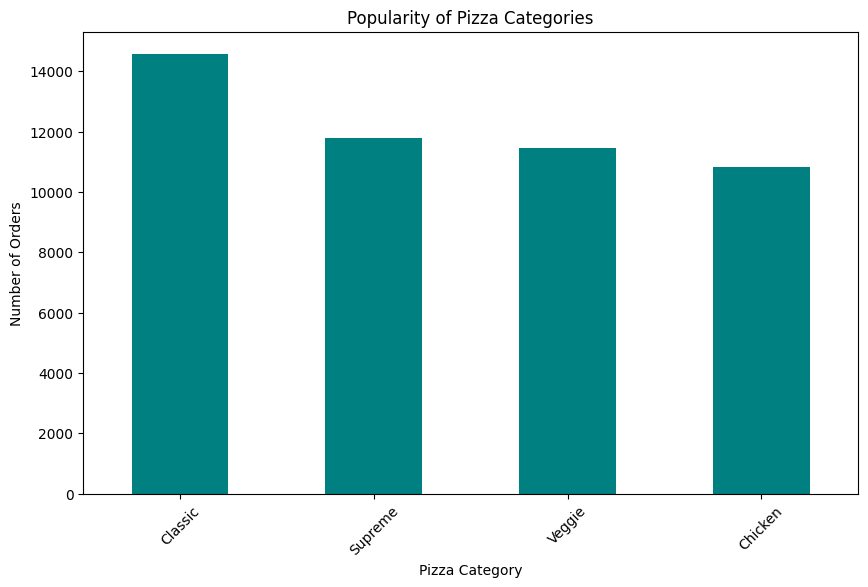

In [12]:
# Count pizza categories
pizza_categories = order_pizza_types['category'].value_counts()

# Plot pizza categories
plt.figure(figsize=(10, 6))
pizza_categories.plot(kind='bar', color='teal')
plt.title("Popularity of Pizza Categories")
plt.xlabel("Pizza Category")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

Popularity of Pizza Categories  
Description: This bar chart shows the number of orders for each pizza category (e.g., Vegetarian, Meat).
Insight: This provides insight into customer preferences for certain categories, which can influence menu development. For example, if vegetarian options are popular, it may be worth expanding that section of the menu.

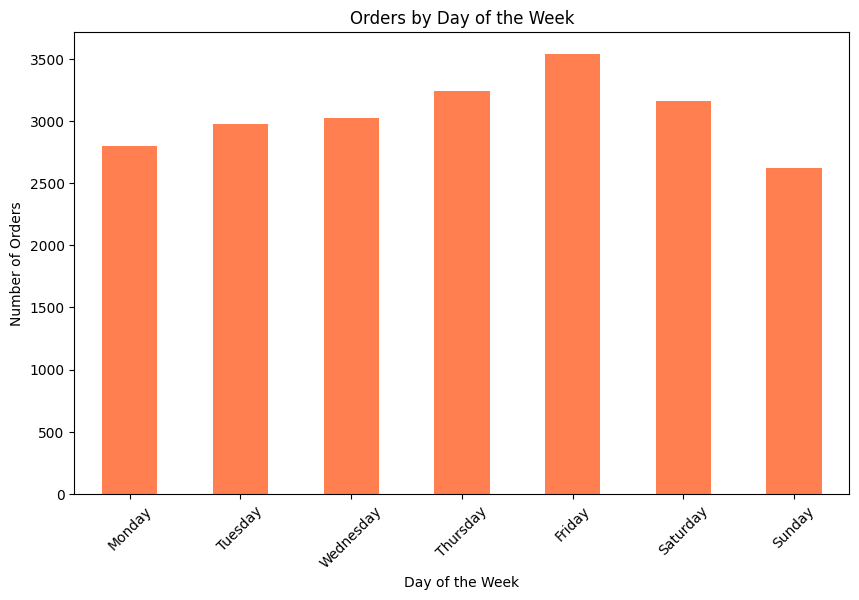

In [13]:
# Extract day of the week from order date
orders_df['day_of_week'] = orders_df['order_date'].dt.day_name()

# Count orders by day of the week
orders_by_day = orders_df['day_of_week'].value_counts()

# Plot orders by day of the week
plt.figure(figsize=(10, 6))
orders_by_day.loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].plot(kind='bar', color='coral')
plt.title("Orders by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


Orders by Day of the Week  
Description: This bar chart shows the distribution of orders by each day of the week.
Insight: Identifying which days are busiest can help with staff scheduling and promotional planning. For instance, if weekends have more orders, special weekend promotions or deals might drive even higher sales.

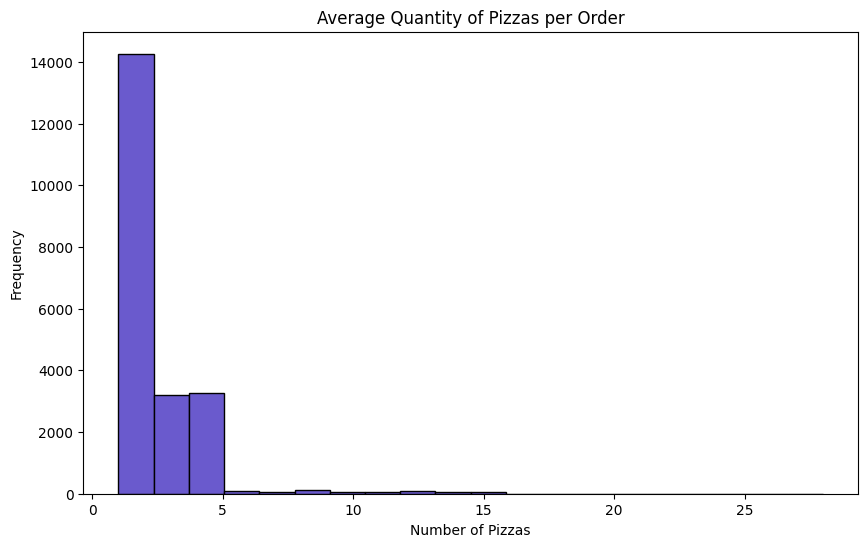

In [14]:
# Calculate quantity per order
quantity_per_order = order_details_df.groupby('order_id')['quantity'].sum()

# Plot histogram of pizzas per order
plt.figure(figsize=(10, 6))
plt.hist(quantity_per_order, bins=20, color='slateblue', edgecolor='black')
plt.title("Average Quantity of Pizzas per Order")
plt.xlabel("Number of Pizzas")
plt.ylabel("Frequency")
plt.show()


Average Quantity of Pizzas per Order  
Description: This histogram represents the distribution of the number of pizzas ordered per transaction.
Insight: Understanding the typical order size helps in identifying common customer behaviors. If many orders are for single pizzas, bundling offers might encourage customers to buy more in a single order.

# Overall Business Recommendations
From the analysis, the following strategic recommendations can be derived:

**Inventory Management:** Stock up on ingredients for best-selling pizzas and the most popular pizza sizes, especially during peak days and seasons. This minimizes the risk of running out of popular items while reducing wastage of less popular ingredients.  
**Targeted Promotions:** Create targeted marketing campaigns focusing on popular pizza types and sizes. For underperforming items, consider offering discounts or bundling them with more popular items to improve sales.  
Menu Optimization: Based on popularity and revenue, adjust the menu to focus on high-demand, high-revenue items. Consider removing or revamping items that don’t sell well.  
**Upselling Strategies:** Leverage customer spending and order patterns to design upselling strategies. Bundle deals, combo offers, or discounts on additional items may encourage customers to increase their average order size.
Operational Planning: Use insights into busy days and months to manage staff scheduling and inventory levels. This ensures efficient service during peak times and avoids overstaffing during slow periods.

# Conclusion
The analysis of pizza sales data reveals actionable insights that can directly impact business performance. By understanding customer demand, revenue trends, product popularity, and order patterns, the business can optimize operations, improve customer satisfaction, and increase profitability. The data-driven approach helps in making informed decisions on inventory, promotions, and staffing, thereby strengthening the business’s market position and operational efficiency.